In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Leads.csv')

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# First we do some EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

9240 Rows and 37 Columns. A lot of null values also.

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
round(df.isnull().sum()*100/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
len(df.drop_duplicates())

9240

No duplicates present.

In [10]:
df.shape[0]

9240

### Lets first drop rows which have more than 25 columns with nulls and are not converted.

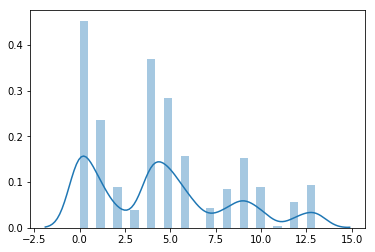

In [11]:
# Null values row wise
sns.distplot(df.isnull().sum(axis=1))

In [12]:
# Since these rows will only worsen our model
df = df[(df['Converted']==1)|(df.isnull().sum(axis=1) <= 8)]

In [13]:
100-df.shape[0]/9240*100

15.779220779220779

Since we have a large dataset we have dropped 15.8% of rows with high null values. But we did not drop any rows that has Converted = 1. Since Conversion is already low and we cant afford to lose information

In [14]:
round(df.isnull().sum()*100/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.45
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.63
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.63
Last Activity                                     1.30
Country                                          21.55
Specialization                                    5.83
How did you hear about X Education               11.80
What is your current occupation                  16.06
What matters most to you in choosing a course    16.11
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Lead Source

In [15]:
# Prospect ID, Lead Number and Lead Origin dont have null values.
# Jumping to Lead Source
df['Lead Source'].value_counts()

Google               2586
Direct Traffic       2254
Organic Search       1060
Olark Chat            979
Reference             532
Welingak Website      142
Referral Sites        122
Facebook               49
google                  5
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Press_Release           2
WeLearn                 1
NC_EDM                  1
Pay per Click Ads       1
blog                    1
testone                 1
Name: Lead Source, dtype: int64

There is just 0.45% of missing values in Lead Source column. We can simply impute this with mode because this is a categorical column.

In [16]:
df.fillna({'Lead Source': df['Lead Source'].mode()[0]}, inplace=True)

In [17]:
df['Lead Source'].isnull().sum()

0

### Total Visits

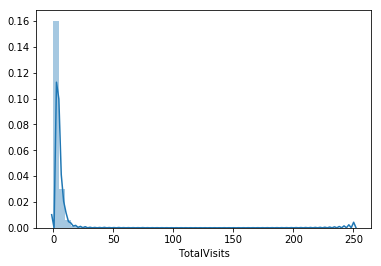

In [18]:
# Numerical variable hence a distributuion plot
sns.distplot(df['TotalVisits'].dropna())

Highly skewed distribution. I will use median to impute this.

In [19]:
df.fillna({'TotalVisits': df['TotalVisits'].median()}, inplace=True)

In [20]:
df['TotalVisits'].isnull().sum()

0

### Page Views Per Visit

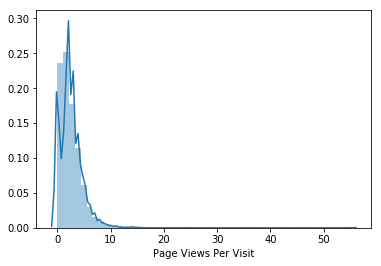

In [21]:
sns.distplot(df['Page Views Per Visit'].dropna())

Using Median again to impute the missing values.

In [22]:
df.fillna({'Page Views Per Visit': df['Page Views Per Visit'].median()}, inplace=True)

In [23]:
df['Page Views Per Visit'].isnull().sum()

0

### Last Activity

In [24]:
# This is a categorical variable
df['Last Activity'].value_counts()

Email Opened                    2962
SMS Sent                        2582
Olark Chat Conversation          520
Page Visited on Website          518
Converted to Lead                361
Email Bounced                    235
Email Link Clicked               206
Form Submitted on Website        105
Unreachable                       87
Unsubscribed                      55
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Using Mode to impute the missing values.

In [25]:
df.fillna({'Last Activity': df['Last Activity'].mode()[0]}, inplace=True)

In [26]:
df['Last Activity'].isnull().sum()

0

### Country

In [27]:
df['Country'].value_counts()

India                   5848
United States             61
United Arab Emirates      49
Singapore                 24
Saudi Arabia              18
United Kingdom            13
Australia                 11
Qatar                      9
Bahrain                    6
Hong Kong                  6
Oman                       6
France                     6
Nigeria                    4
South Africa               4
Kuwait                     4
unknown                    3
Sweden                     3
Canada                     3
Germany                    2
Uganda                     2
Netherlands                2
China                      2
Ghana                      2
Philippines                2
Asia/Pacific Region        2
Bangladesh                 2
Italy                      1
Belgium                    1
Vietnam                    1
Sri Lanka                  1
Indonesia                  1
Malaysia                   1
Kenya                      1
Tanzania                   1
Switzerland   

Although imputing with mode seems good but the percentage of missing is 21.5% here. We will do some more analysis before we impute this column.

In [28]:
df.loc[df['Country'].isnull(),'City'].value_counts()

Select                         1214
Mumbai                          204
Thane & Outskirts                80
Other Cities                     55
Other Cities of Maharashtra      41
Other Metro Cities               13
Tier II Cities                    1
Name: City, dtype: int64

So we have got some rows which have city but no country. <br> We can impute India for Mumbai, Thane & Outskirts, Other Cities of Mahrashtra. But even after that we don't know much about other countries. <br>Since we have a country as unknown also. we will fill the missing values with unknown. 

In [29]:
# Replacing nulls with India where we know because of city
df.loc[(df['Country'].isnull())&((df['City']=='Mumbai')| (df['City']=='Thane & Outskirts')|(df['City']=='Other Cities of Maharashtra')),['Country']] = 'India'

In [30]:
# Checking if it worked fine
df.loc[df['Country'].isnull(),'City'].value_counts()

Select                1214
Other Cities            55
Other Metro Cities      13
Tier II Cities           1
Name: City, dtype: int64

In [31]:
# Replacing rest nulls with unknown
df.loc[df['Country'].isnull(),['Country']] = 'unknown'

In [32]:
df['Country'].isnull().sum()

0

### Specialization

In [33]:
df['Specialization'].value_counts()

Select                               1934
Finance Management                    896
Human Resource Management             784
Marketing Management                  776
Operations Management                 464
Business Administration               377
IT Projects Management                331
Supply Chain Management               328
Banking, Investment And Insurance     321
Media and Advertising                 185
Travel and Tourism                    176
International Business                161
Healthcare Management                 141
Hospitality Management                106
E-COMMERCE                            103
Retail Management                      90
Rural and Agribusiness                 67
E-Business                             53
Services Excellence                    35
Name: Specialization, dtype: int64

Here also since we have 'Select' available. We will impute with it.

In [34]:
df.loc[df['Specialization'].isnull(),['Specialization']] = 'Select'

In [35]:
df['Specialization'].isnull().sum()

0

### How did you hear about X Education

In [36]:
df['How did you hear about X Education'].value_counts()

Select                   5040
Online Search             737
Word Of Mouth             319
Student of SomeSchool     292
Other                     174
Multiple Sources          138
Advertisements             61
Social Media               61
Email                      24
SMS                        18
Name: How did you hear about X Education, dtype: int64

In [37]:
df.loc[df['How did you hear about X Education'].isnull(),['How did you hear about X Education']] = 'Select'

In [38]:
df['How did you hear about X Education'].isnull().sum()

0

### What is your current occupation

In [39]:
df['What is your current occupation'].value_counts()

Unemployed              5596
Working Professional     704
Student                  198
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

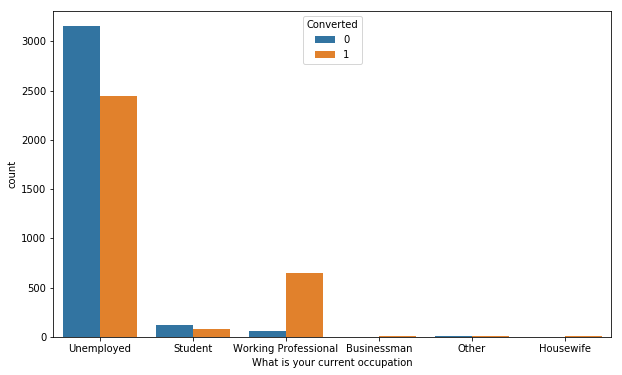

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['What is your current occupation'], hue=df['Converted'])

In [41]:
df.groupby(by=['Converted','What is your current occupation'])['Prospect ID'].count()

Converted  What is your current occupation
0          Businessman                           3
           Other                                 6
           Student                             120
           Unemployed                         3155
           Working Professional                 57
1          Businessman                           5
           Housewife                            10
           Other                                10
           Student                              78
           Unemployed                         2441
           Working Professional                647
Name: Prospect ID, dtype: int64

Current Occupation affects the conversion highly and varies greatly. So if we impute missing with any one category it will create biased model. Since our nulls are high 16.06%. <br> We will create a new category as unknown here for nulls.

In [42]:
df.loc[df['What is your current occupation'].isnull(),['What is your current occupation']] = 'unknown'

In [43]:
df['What is your current occupation'].isnull().sum()

0

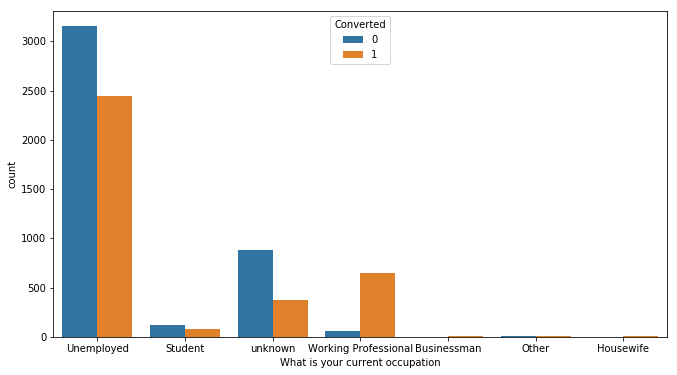

In [44]:
# Distribution of Current Occupation vs Converted after adding unknown
plt.figure(figsize=(11,6))
sns.countplot(x=df['What is your current occupation'], hue=df['Converted'])

### What matters most to you in choosing a course

In [45]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6525
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [46]:
# Simply impute Better Career Prospects for nulls here
df.loc[df['What matters most to you in choosing a course'].isnull(),['What matters most to you in choosing a course']] = 'Better Career Prospects'

In [47]:
df['What matters most to you in choosing a course'].isnull().sum()

0

### Tags

In [48]:
df['Tags'].value_counts(dropna=False)

Will revert after reading the email                  2072
NaN                                                  1901
Ringing                                              1202
Interested in other courses                           508
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [49]:
df.loc[df['Tags'].isnull(),['Tags']] = 'unknown'

In [50]:
df['Tags'].isnull().sum()

0

### Lead Quality

In [51]:
df['Lead Quality'].value_counts(dropna=False)

NaN                  3309
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

Here Also it is very high null values. These Simply mean we dont know about the lead quality. I am imputing unknown here.

In [52]:
df.loc[df['Lead Quality'].isnull(),['Lead Quality']] = 'unknown'

In [53]:
df['Lead Quality'].isnull().sum()

0

### Lead Profile

In [54]:
df['Lead Profile'].value_counts(dropna=False)

Select                         4143
Potential Lead                 1613
NaN                            1254
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [55]:
df.loc[df['Lead Profile'].isnull(),['Lead Profile']] = 'Select'

In [56]:
df['Lead Profile'].isnull().sum()

0

### City

In [57]:
df['City'].value_counts(dropna=False)

Mumbai                         2953
Select                         2246
Thane & Outskirts               691
Other Cities                    621
NaN                             454
Other Cities of Maharashtra     407
Other Metro Cities              347
Tier II Cities                   63
Name: City, dtype: int64

In [58]:
df.loc[df['City'].isnull(),['City']] = 'Select'

In [59]:
df['City'].isnull().sum()

0

### Asymmetrique Activity Index(AAI) & Asymmetrique Activity Score(AAS)

In [60]:
df['Asymmetrique Activity Index'].value_counts(dropna=False)

02.Medium    3752
NaN          3162
01.High       515
03.Low        353
Name: Asymmetrique Activity Index, dtype: int64

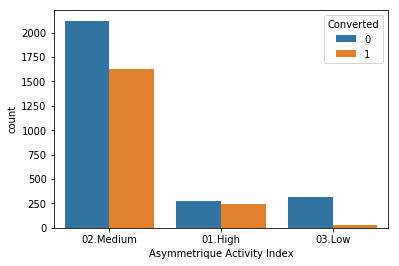

In [61]:
sns.countplot(x=df['Asymmetrique Activity Index'], hue=df['Converted'])

It is quite clear from the above plot that when Asymmetrique Activity Index(AAI) is <br>High - conversion is close to 50%<br>Medium - Still above average of 38% <br>Low - Very low<br> This suggests that AAI is very crucial feature.<br> Lets Examine Asymmetrique Activity Score(AAS) here too.

In [62]:
df['Asymmetrique Activity Score'].value_counts(dropna=False)

NaN      3162
 14.0    1729
 15.0    1250
 13.0     773
 16.0     408
 12.0     189
 17.0     102
 11.0      93
 10.0      57
 9.0        9
 18.0       5
 8.0        4
 7.0        1
Name: Asymmetrique Activity Score, dtype: int64

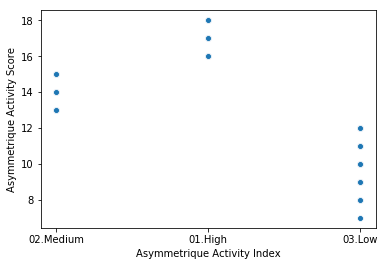

In [63]:
sns.scatterplot(data=df,x='Asymmetrique Activity Index',y='Asymmetrique Activity Score')

As suspected, AAI is based on AAS.<br> AAS < 13 = Low<br>13 < AAS < 15 = Medium<br>AAS > 15 = High.<br>AAI - logistic regression model - More robust that way<br>AAS - PCA - as categorical is not good for PCA

AAS is probably dependent on other features like  TotalVisits, Total Time Spent on Website, Page Views Per Visit.

I would use 55% data of AAS to predict rest 45% missing AAS and impute it. This will also give us the AAI. And in turn we will be able to drop these 3 features altogether.

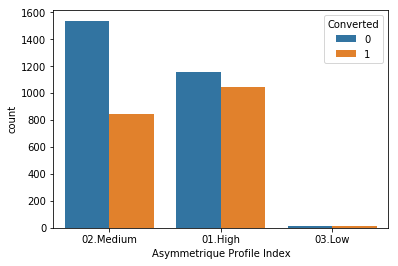

In [100]:
sns.countplot(x=df['Asymmetrique Profile Index'], hue=df['Converted'])

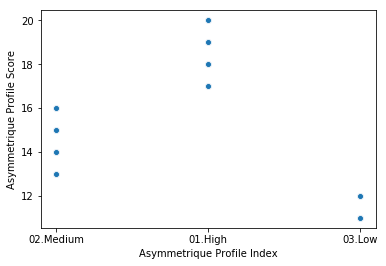

In [101]:
sns.scatterplot(data=df,x='Asymmetrique Profile Index',y='Asymmetrique Profile Score')

In [65]:
score = df[['Asymmetrique Activity Score', 'TotalVisits','Total Time Spent on Website','Page Views Per Visit']].copy()

In [66]:
score.head()

,Asymmetrique Activity Score,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,15.0,0.0,0,0.0
1,15.0,5.0,674,2.5
2,14.0,2.0,1532,2.0
3,13.0,1.0,305,1.0
4,15.0,2.0,1428,1.0


In [67]:
from sklearn.model_selection import train_test_split

In [71]:
test_score = score.loc[score['Asymmetrique Activity Score'].isnull(),:]

In [73]:
test_score.head()

,Asymmetrique Activity Score,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1388,NaN,2.0,2020,2.0
1401,NaN,3.0,1459,3.0
2629,NaN,0.0,0,0.0
2631,NaN,0.0,0,0.0
2632,NaN,0.0,0,0.0


In [72]:
train_score = score.loc[score['Asymmetrique Activity Score'].notnull(),:]

In [74]:
train_score.head()

,Asymmetrique Activity Score,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,15.0,0.0,0,0.0
1,15.0,5.0,674,2.5
2,14.0,2.0,1532,2.0
3,13.0,1.0,305,1.0
4,15.0,2.0,1428,1.0


In [75]:
y = train_score.pop('Asymmetrique Activity Score')
X = train_score

In [78]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler = MinMaxScaler()

In [104]:
X_train = scaler.fit_transform(X_train)

In [105]:
X_valid = scaler.transform(X_valid)

In [106]:
scaler_y = MinMaxScaler()

In [107]:
y_train = scaler_y.fit_transform(pd.DataFrame(y_train))

In [108]:
y_valid = scaler_y.transform(pd.DataFrame(y_valid))

In [109]:
import statsmodels.api as sm

In [110]:
X_train_lm = sm.add_constant(X_train)

In [111]:
lr = sm.OLS(y_train, X_train_lm).fit()

In [112]:
lr.params

array([ 0.64430662,  0.3506277 ,  0.0336106 , -0.2573787 ])

In [113]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     13.36
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           1.16e-08
Time:                        20:26:42   Log-Likelihood:                 2387.2
No. Observations:                3095   AIC:                            -4766.
Df Residuals:                    3091   BIC:                            -4742.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6443      0.003    187.510      0.0

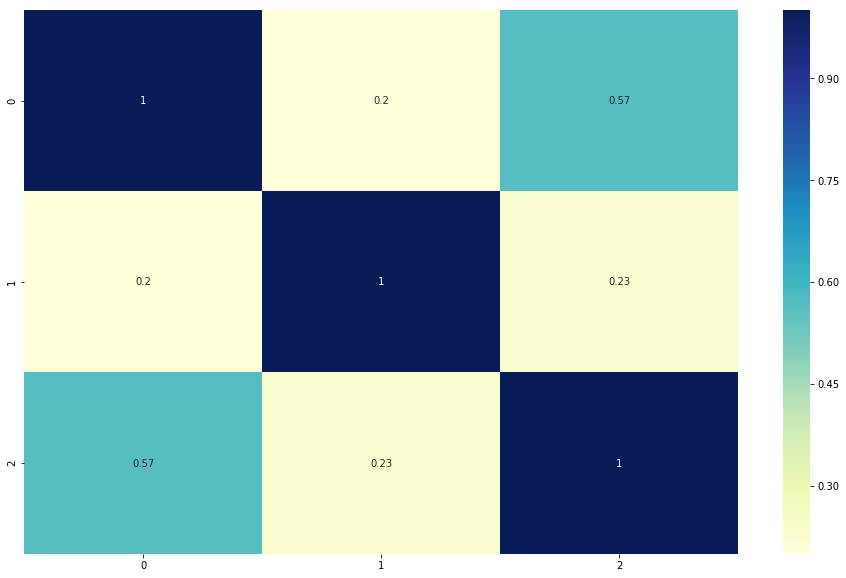

In [98]:
plt.figure(figsize = (16, 10))
sns.heatmap(pd.DataFrame(X_train).corr(), annot = True, cmap="YlGnBu")
plt.show()